In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [8]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
import vrp_algorithms_lib.analytical_tools.viz as my_viz
import vrp_algorithms_lib.common_tools.file_utils as file_utils
from vrp_algorithms_lib.algorithm.greedy_algorithm import GreedyAlgorithm
from vrp_algorithms_lib.algorithm.clusterization.clusterizer_name import ClusterizerName
from vrp_algorithms_lib.problem.models import ProblemDescription
from vrp_algorithms_lib.problem.models import Routes
from vrp_algorithms_lib.problem.penalty_calculator import PenaltyCalculator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
test_name = 'large_test_2'
test_path = f'../test_data/inputs/{test_name}/'

problem_description_path = os.path.join(test_path, 'problem_description.json')
problem_description_json = file_utils.read_json(problem_description_path)
problem_description: ProblemDescription = ProblemDescription.parse_obj(problem_description_json)
    
request_path = os.path.join(test_path, 'request.json')
request_json = file_utils.read_json(request_path)

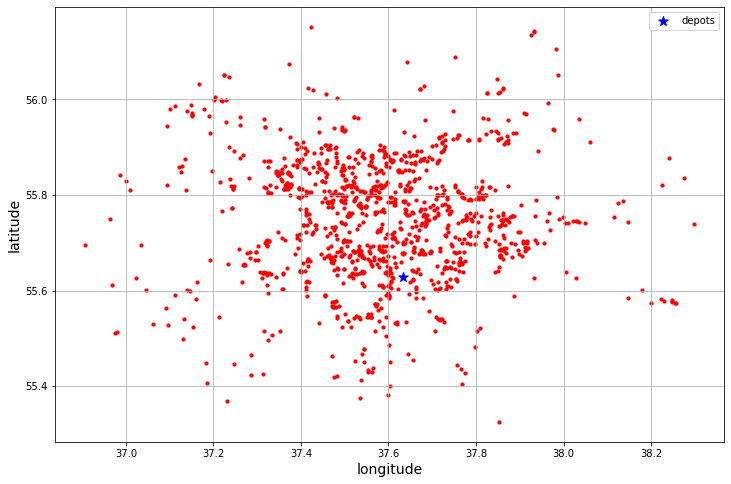

In [11]:
my_viz.plot_map(request_json)

In [12]:
algorithm = GreedyAlgorithm(clusterizer_name = ClusterizerName.KMeansClusterizer)
routes: Routes = algorithm.solve_problem(problem_description)

In [17]:
penalty = PenaltyCalculator.calculate(problem_description, routes)

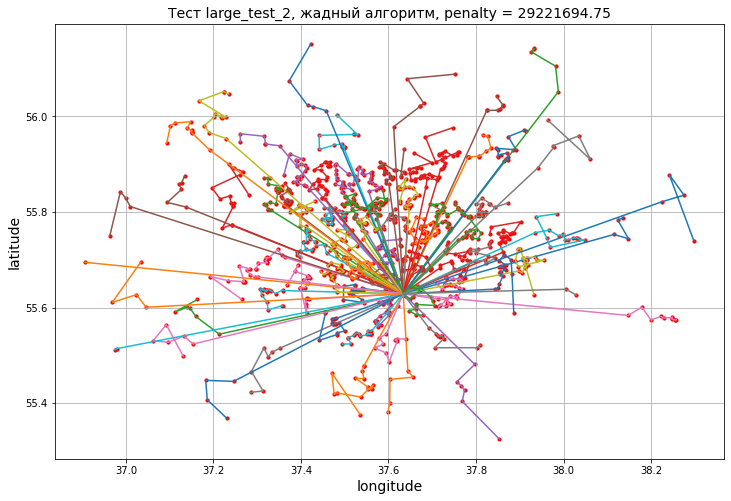

In [19]:
plt.figure(figsize=(12, 8))
my_viz.plot_routes(request_json, json.loads(routes.json())['routes'], ax=plt.gca(), legend=False)
plt.title(f'Тест {test_name}, жадный алгоритм, penalty = {round(penalty, 2)}', fontsize=14)
plt.show()

In [23]:
path_to_routes_greedy = os.path.join('../test_data/results/greedy/large_test_2/routes.json')
file_utils.save_json(routes.dict(), path_to_routes_greedy)